<a href="https://colab.research.google.com/github/corydoras15/Linear-Regression/blob/main/3_Decision_Tree_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
bike_df = pd.read_csv('https://raw.githubusercontent.com/DSNote/fastcampus/main/bike.csv')

# 종속변수 확인

In [3]:
bike_df.head() # 종속변수 확인

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 0:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,NaN,NaN,20,Clouds
1,2018-01-01 1:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,NaN,NaN,1,Clear
2,2018-01-01 2:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,NaN,NaN,1,Clear
3,2018-01-01 3:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,NaN,NaN,1,Clear
4,2018-01-01 4:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,NaN,NaN,1,Clear


In [8]:
bike_df[bike_df['workingday'] == 0]['holiday'].unique() # workingday가 0 중에 holiday의 카테고리 종류

array([1, 0])

In [10]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      33379 non-null  object 
 1   count         33379 non-null  int64  
 2   holiday       33379 non-null  int64  
 3   workingday    33379 non-null  int64  
 4   temp          33379 non-null  float64
 5   feels_like    33379 non-null  float64
 6   temp_min      33379 non-null  float64
 7   temp_max      33379 non-null  float64
 8   pressure      33379 non-null  int64  
 9   humidity      33379 non-null  int64  
 10  wind_speed    33379 non-null  float64
 11  wind_deg      33379 non-null  int64  
 12  rain_1h       6771 non-null   float64
 13  snow_1h       326 non-null    float64
 14  clouds_all    33379 non-null  int64  
 15  weather_main  33379 non-null  object 
dtypes: float64(7), int64(7), object(2)
memory usage: 4.1+ MB


In [11]:
bike_df.describe()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all
count,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,6771.000000,326.000000,33379.000000
mean,333.139788,0.030618,0.681327,15.213087,14.994843,13.532648,16.105542,1017.071602,67.818628,1.829340,174.022919,1.216475,0.641380,63.213997
std,336.519514,0.172283,0.465969,9.908964,11.176487,9.993094,9.984839,7.379420,18.422105,1.703747,113.844334,2.056222,0.571087,30.825936
min,0.000000,0.000000,0.000000,-12.790000,-18.910000,-15.140000,-12.290000,980.000000,14.000000,0.000000,0.000000,0.100000,0.100000,0.000000
25%,59.000000,0.000000,0.000000,6.860000,5.880000,5.230000,7.730000,1012.000000,53.000000,0.450000,62.000000,0.250000,0.250000,40.000000
50%,236.000000,0.000000,1.000000,15.650000,15.020000,13.910000,16.590000,1017.000000,70.000000,1.340000,180.000000,0.530000,0.420000,75.000000
75%,495.000000,0.000000,1.000000,23.800000,24.140000,21.970000,24.390000,1022.000000,84.000000,2.600000,285.000000,1.300000,1.000000,90.000000
max,2038.000000,1.000000,1.000000,36.710000,43.710000,35.380000,38.810000,1044.000000,100.000000,16.980000,360.000000,54.050000,3.300000,100.000000


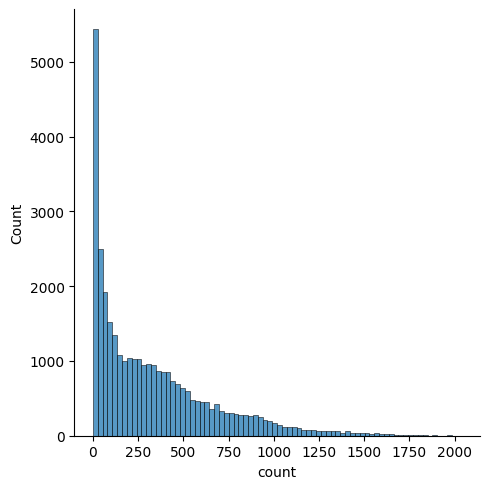

In [12]:
sns.displot(bike_df['count'])

<Axes: ylabel='count'>

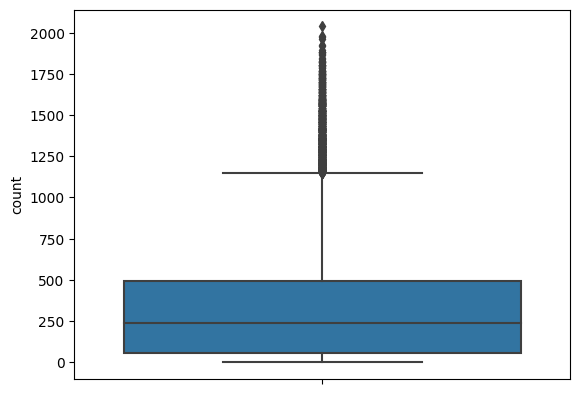

In [13]:
sns.boxplot(y = bike_df['count'])

<Axes: xlabel='feels_like', ylabel='count'>

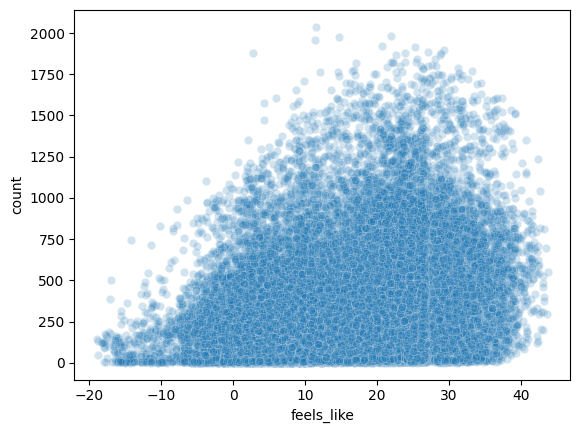

In [15]:
sns.scatterplot(x = 'feels_like', y = 'count', data = bike_df, alpha = 0.2) # alpha = 1불투명, 0투명

<Axes: xlabel='pressure', ylabel='count'>

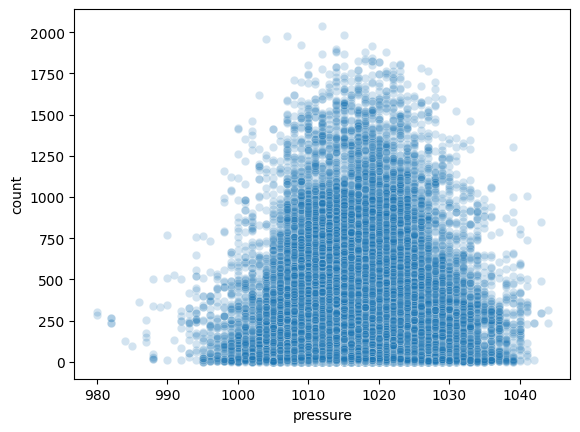

In [16]:
sns.scatterplot(x = 'pressure', y = 'count', data = bike_df, alpha = 0.2)

<Axes: xlabel='wind_speed', ylabel='count'>

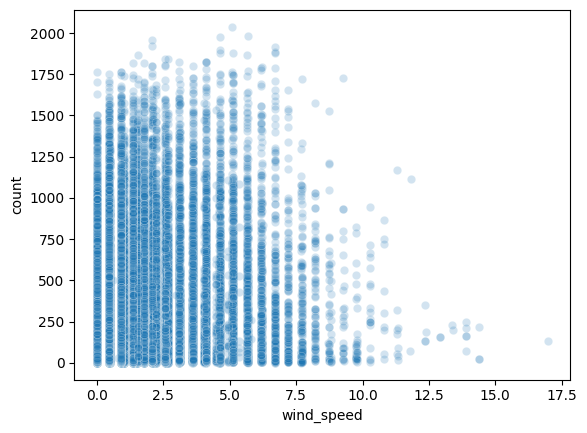

In [17]:
sns.scatterplot(x = 'wind_speed', y = 'count', data = bike_df, alpha = 0.2)

<Axes: xlabel='wind_deg', ylabel='count'>

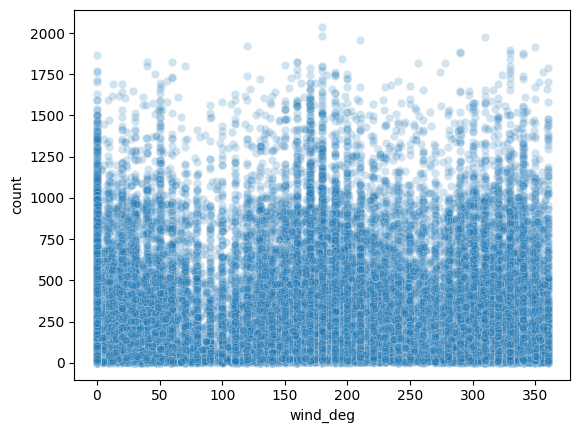

In [18]:
sns.scatterplot(x = 'wind_deg', y = 'count', data = bike_df, alpha = 0.2)

<Axes: xlabel='weather_main', ylabel='count'>

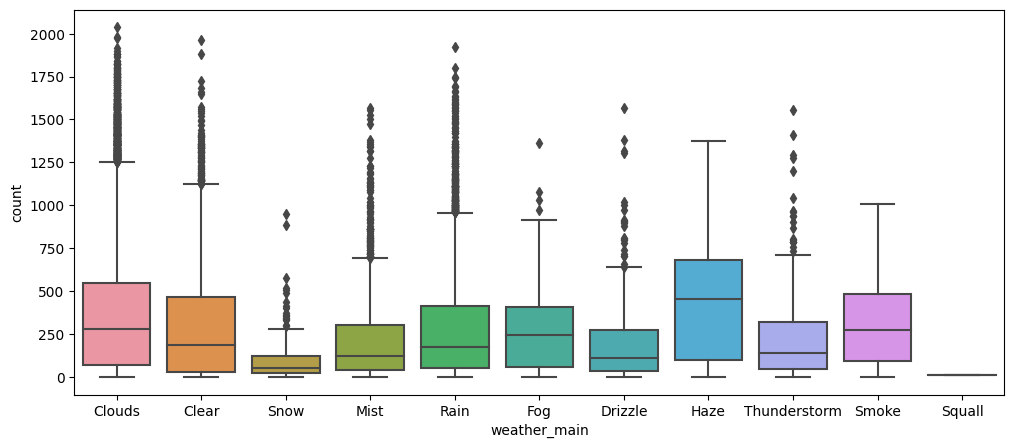

In [21]:
plt.figure(figsize = (12, 5)) # 차트 크기 변경 (X, Y)
sns.boxplot(x = 'weather_main', y = 'count', data = bike_df)

# 결측치 처리

In [7]:
bike_df.isna().sum()

datetime            0
count               0
holiday             0
workingday          0
temp                0
feels_like          0
temp_min            0
temp_max            0
pressure            0
humidity            0
wind_speed          0
wind_deg            0
rain_1h         26608
snow_1h         33053
clouds_all          0
weather_main        0
dtype: int64

In [8]:
bike_df.isna().mean() # 결측치 높으면 삭제만 데이터 표현이 0을 결측치로 표현 

datetime        0.000000
count           0.000000
holiday         0.000000
workingday      0.000000
temp            0.000000
feels_like      0.000000
temp_min        0.000000
temp_max        0.000000
pressure        0.000000
humidity        0.000000
wind_speed      0.000000
wind_deg        0.000000
rain_1h         0.797148
snow_1h         0.990233
clouds_all      0.000000
weather_main    0.000000
dtype: float64

In [ ]:
bike_df['rain_1h'] = bike_df['rain_1h'].fillna(0) # 결측치 0으로 채우기

In [10]:
bike_df = bike_df.fillna(0) # 모든 결측치 0으로 채우기

In [11]:
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 0:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds
1,2018-01-01 1:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear
2,2018-01-01 2:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear
3,2018-01-01 3:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear
4,2018-01-01 4:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear


In [12]:
bike_df.isna().mean() # 결측치 처리 확인

datetime        0.0
count           0.0
holiday         0.0
workingday      0.0
temp            0.0
feels_like      0.0
temp_min        0.0
temp_max        0.0
pressure        0.0
humidity        0.0
wind_speed      0.0
wind_deg        0.0
rain_1h         0.0
snow_1h         0.0
clouds_all      0.0
weather_main    0.0
dtype: float64

# 시간 데이터 변환

In [13]:
bike_df['datetime']= pd.to_datetime(bike_df['datetime']) # datetime 변환

In [14]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      33379 non-null  datetime64[ns]
 1   count         33379 non-null  int64         
 2   holiday       33379 non-null  int64         
 3   workingday    33379 non-null  int64         
 4   temp          33379 non-null  float64       
 5   feels_like    33379 non-null  float64       
 6   temp_min      33379 non-null  float64       
 7   temp_max      33379 non-null  float64       
 8   pressure      33379 non-null  int64         
 9   humidity      33379 non-null  int64         
 10  wind_speed    33379 non-null  float64       
 11  wind_deg      33379 non-null  int64         
 12  rain_1h       33379 non-null  float64       
 13  snow_1h       33379 non-null  float64       
 14  clouds_all    33379 non-null  int64         
 15  weather_main  33379 non-null  object

In [16]:
bike_df['year'] = bike_df['datetime'].dt.year # .데이트 타입으로 날자 뽑기.년, 월, 일, 시, 분, 초

In [17]:
bike_df['month'] = bike_df['datetime'].dt.month # 열 만들기

In [19]:
bike_df['hour'] = bike_df['datetime'].dt.hour

In [21]:
bike_df['date'] = bike_df['datetime'].dt.date # 년월일 함께

In [22]:
bike_df.head(3)

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,month,hour,date
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,1,0,2018-01-01
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,1,1,2018-01-01
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,1,2,2018-01-01


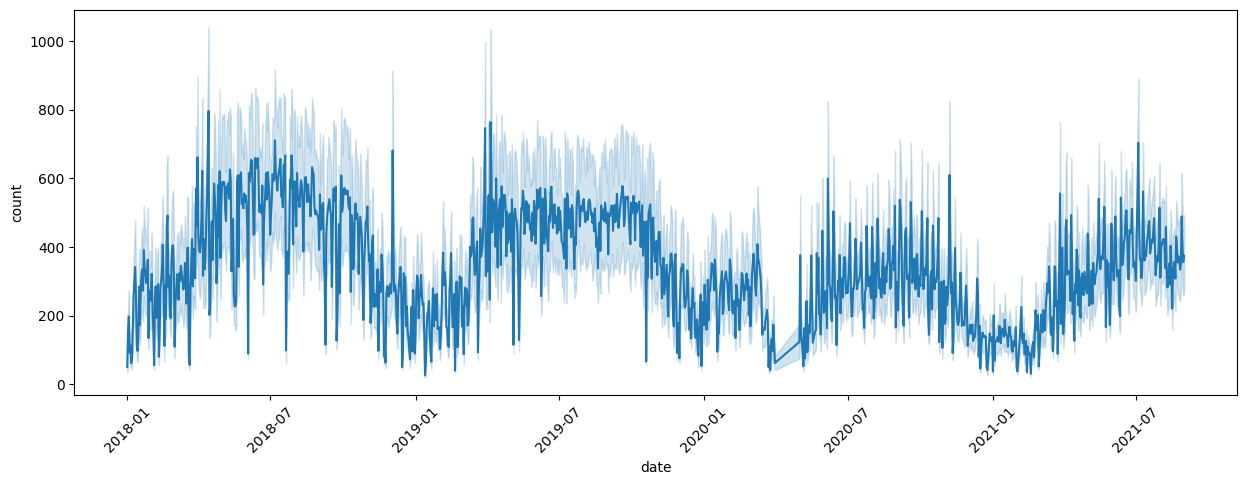

In [25]:
plt.figure(figsize = (15,5)) # 그래프 크기 (x,y)
sns.lineplot(x = 'date', y = 'count', data = bike_df)
plt.xticks(rotation = 45) # 그래프 기울기
plt.show() # 텍스트 정리

In [28]:
bike_df[bike_df['year'] == 2019].groupby('month').mean()['count'] # year 에서 2019와 같은 데이터 보기.month묶기.평균의 count만 보기

<ipython-input-28-9e8b5da3ee0f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df[bike_df['year'] == 2019].groupby('month').mean()['count'] # year 에서 2019와 같은 데이터 보기.month묶기.평균의 count만 보기


month
1     193.368862
2     221.857718
3     326.564456
4     482.931694
5     438.027848
6     478.480053
7     472.745785
8     481.267366
9     500.862069
10    446.279070
11    307.295393
12    213.148886
Name: count, dtype: float64

In [30]:
bike_df[bike_df['year'] == 2020].groupby('month').mean()['count']

<ipython-input-30-d3e769856a28>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df[bike_df['year'] == 2020].groupby('month').mean()['count']


month
1     260.445997
2     255.894320
3     217.135241
5     196.581064
6     290.900937
7     299.811688
8     331.528809
9     338.876478
10    293.640777
11    240.507324
12    138.993540
Name: count, dtype: float64

In [31]:
bike_df[bike_df['year'] == 2021].groupby('month').mean()['count']

<ipython-input-31-8615c2630b11>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df[bike_df['year'] == 2021].groupby('month').mean()['count']


month
1    129.363525
2    113.081115
3    222.504988
4    299.140921
5    337.126797
6    381.195155
7    418.996011
8    362.574803
Name: count, dtype: float64

In [35]:
def covid(date):
  if str(date) < '2020-04-01':
    return 'precovid'
  elif str(date) < '2020-04-01':
    return 'covid'
  else:
    return 'postcovid'


In [36]:
covid(bike_df['date']) # 윗 한줄만 적용

'precovid'

In [37]:
bike_df['date'].apply(covid) # .시리즈 적용

0         precovid
1         precovid
2         precovid
3         precovid
4         precovid
           ...    
33374    postcovid
33375    postcovid
33376    postcovid
33377    postcovid
33378    postcovid
Name: date, Length: 33379, dtype: object

In [77]:
bike_df['covid'] = bike_df['date'].apply(lambda date: 'precovid' if str(date) < '2020-04-01' else 'covid' if str(date) < '2021-04-01' else 'postcovid')

In [79]:
bike_df['season'] = bike_df['month'].apply(lambda month: 'winter' if month < 3 else 'spirng' if month < 6 else 'summur' if month < 9 else 'autum' if month < 12 else 'winter')

In [81]:
bike_df[['season', 'month']].loc[123]

season    winter
month          1
Name: 123, dtype: object

In [82]:
bike_df['day_night'] = bike_df['hour'].apply(lambda x: 'night' if x >= 21 else 'late evening' if x >= 19 else 'early evening' if x >= 17 else 'late afternoon' if x >= 16 else 'early afternoon' if x >= 13 else 'late moning' if x >= 11 else 'early moning' if x >= 5 else 'night')

In [83]:
bike_df.head(3) 

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,...,clouds_all,weather_main,year,month,hour,date,precovid,season,day_night,covid
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,...,20,Clouds,2018,1,0,2018-01-01,precovid,winter,night,precovid
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,...,1,Clear,2018,1,1,2018-01-01,precovid,winter,night,precovid
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,...,1,Clear,2018,1,2,2018-01-01,precovid,winter,night,precovid


In [87]:
bike_df1 = bike_df.drop(['datetime', 'month', 'date', 'precovid'], axis = 1).copy() # 변수 정리

In [88]:
bike_df1.head(3) # 더미변수 확인

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,hour,season,day_night,covid
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,0,winter,night,precovid
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,1,winter,night,precovid
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,2,winter,night,precovid


In [90]:
for i in['weather_main', 'hour', 'covid', 'season', 'day_night']:
  print(i, bike_df1[i].nunique())

weather_main 11
hour 24
covid 3
season 4
day_night 7


In [92]:
bike_df1['weather_main'].unique()

array(['Clouds', 'Clear', 'Snow', 'Mist', 'Rain', 'Fog', 'Drizzle',
       'Haze', 'Thunderstorm', 'Smoke', 'Squall'], dtype=object)

In [94]:
bike_df2 = pd.get_dummies(bike_df1, columns = ['weather_main', 'hour', 'covid', 'season', 'day_night'])

In [95]:
bike_df2.head()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,...,season_spirng,season_summur,season_winter,day_night_early afternoon,day_night_early evening,day_night_early moning,day_night_late afternoon,day_night_late evening,day_night_late moning,day_night_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,...,0,0,1,0,0,0,0,0,0,1
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,...,0,0,1,0,0,0,0,0,0,1
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,...,0,0,1,0,0,0,0,0,0,1
3,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,...,0,0,1,0,0,0,0,0,0,1
4,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,...,0,0,1,0,0,0,0,0,0,1


#모델링(Decision Tree)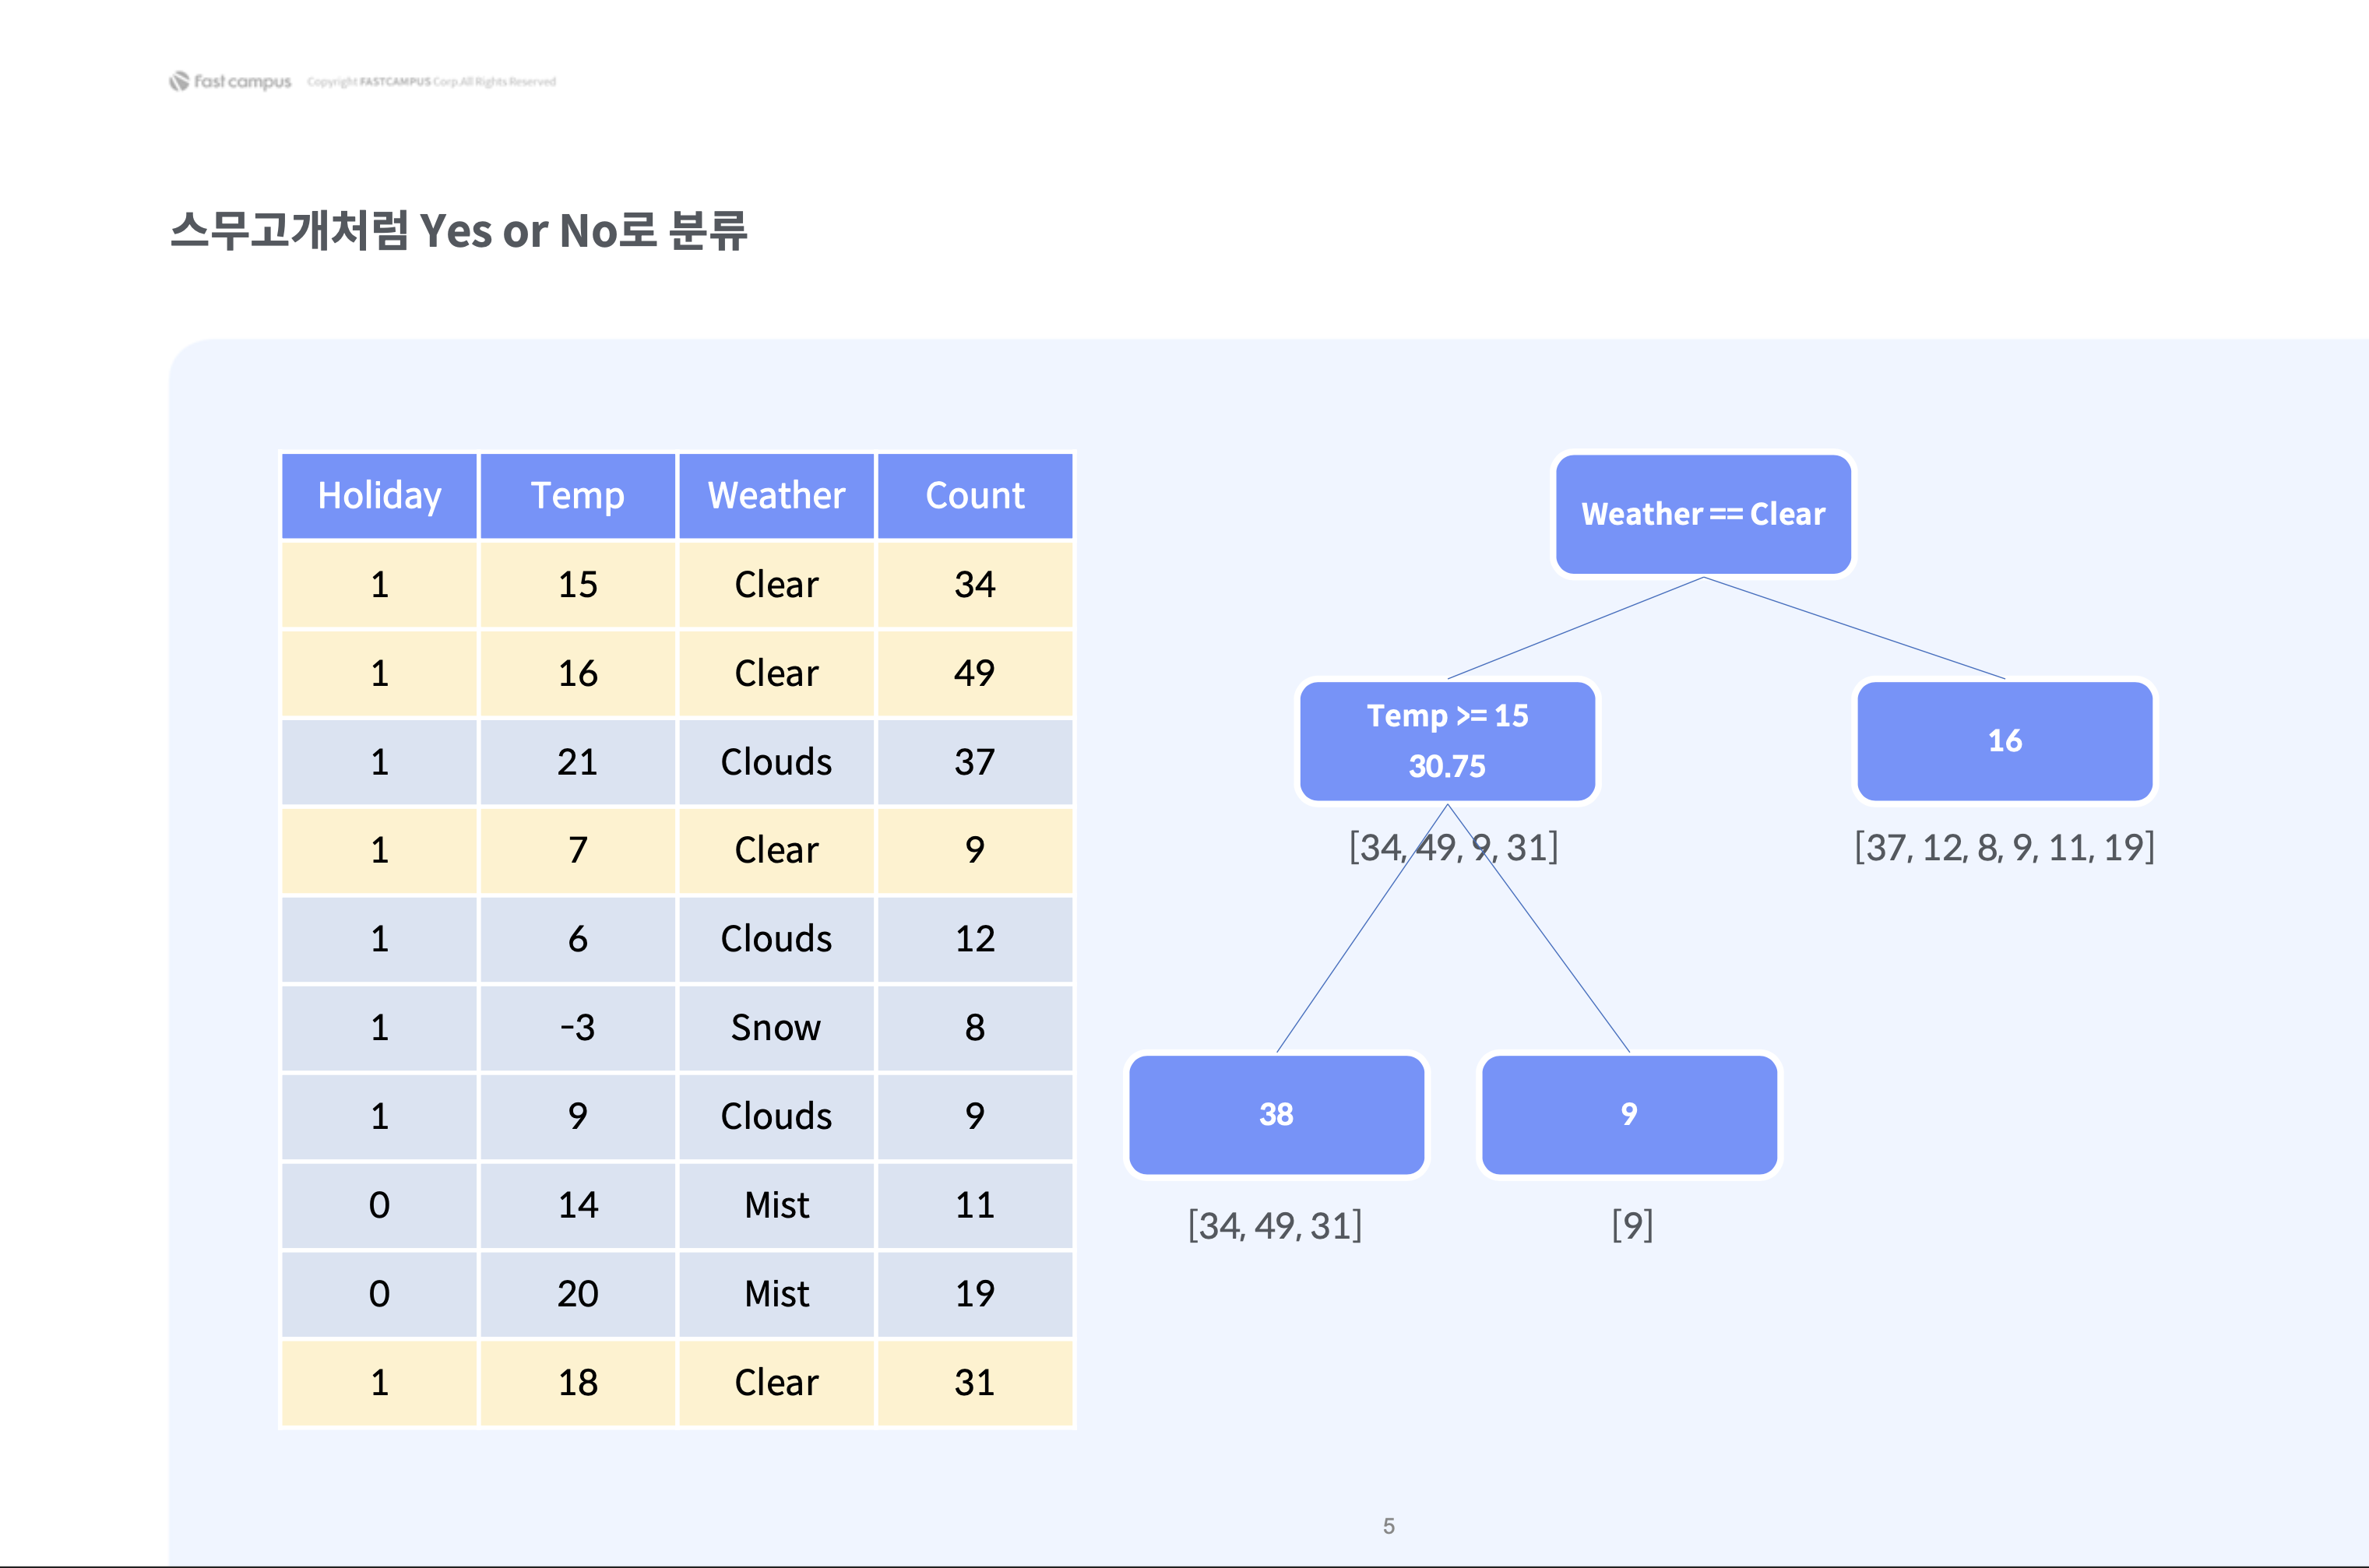

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X = bike_df2.drop('count', axis = 1) # 아래서 한번에
y = bike_df2['count']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(bike_df2.drop('count', axis = 1), bike_df2['count'], test_size = 0.3, random_state=100)

In [99]:
from sklearn.tree import DecisionTreeRegressor

In [100]:
dt = DecisionTreeRegressor(random_state=100)

In [101]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [105]:
pred_1 = dt.predict(X_test)

<Axes: xlabel='count'>

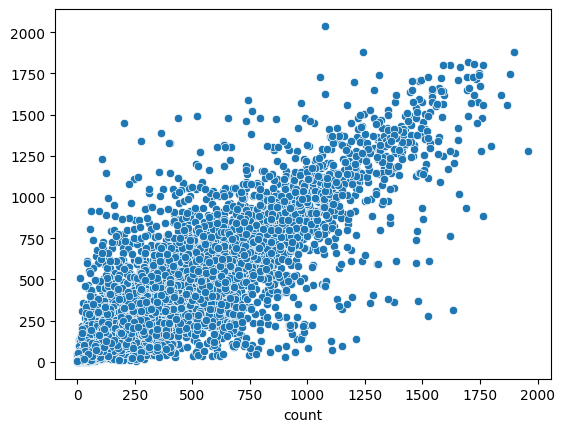

In [112]:
sns.scatterplot(x = y_test, y = pred_1)

In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
mean_squared_error(y_test, pred_1, squared = False)

157.25436715593796

#리니어 리그레션과 비교

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
lr = LinearRegression()

In [115]:
lr.fit(X_train, y_train)

LinearRegression()

In [116]:
pred_2 = lr.predict(X_test)

<Axes: xlabel='count'>

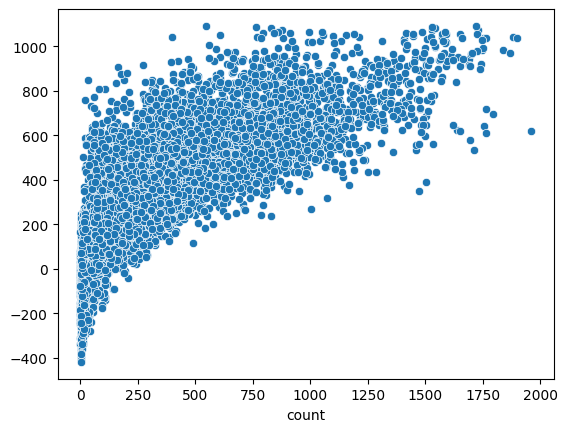

In [117]:
sns.scatterplot(x = y_test, y = pred_2)

In [118]:
mean_squared_error(y_test, pred_2, squared = False)

206.04450974570275

In [120]:
lr.fit(X_train, np.log(y_train + 1))

LinearRegression()

In [121]:
pred_3 = lr.predict(X_test)

In [122]:
pred_3 = np.exp(pred_3) - 1

In [123]:
mean_squared_error(y_test, pred_3, squared = False)

204.4580607035578

# 하이퍼 파라미터 튜닝

In [124]:
dt = DecisionTreeRegressor(random_state = 100, max_depth= 50, min_samples_leaf=30) # (, 최대 깊이, 최소 분류량)

In [125]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, min_samples_leaf=30, random_state=100)

In [126]:
pred_4 = dt.predict(X_test)

In [127]:
mean_squared_error(y_test, pred_4, squared=False)

138.70125316348356

# 트리 플랏

In [128]:
from sklearn.tree import plot_tree

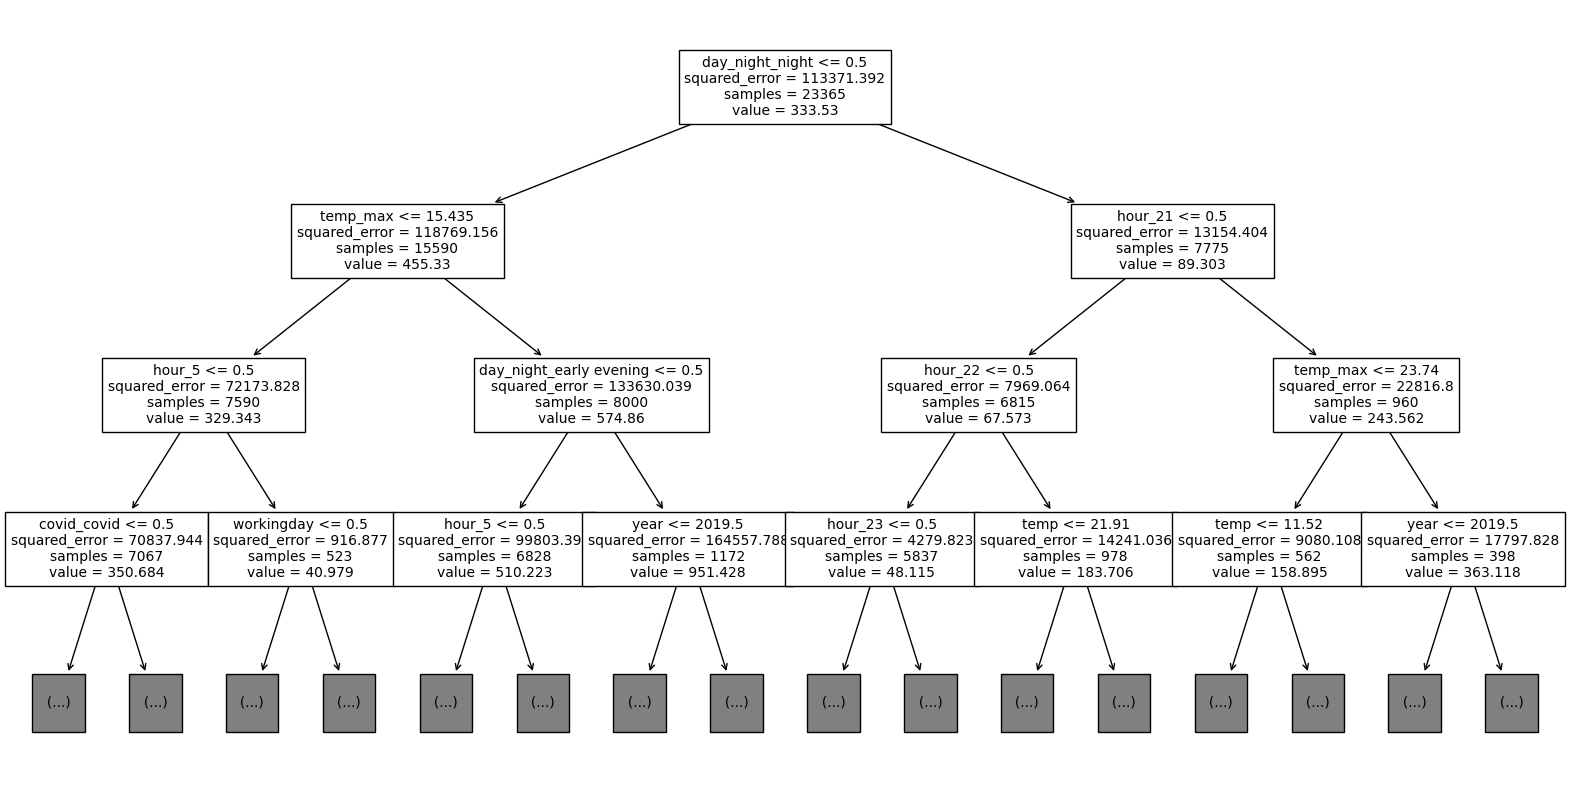

In [132]:
plt.figure(figsize=(20,10))
plot_tree(dt, max_depth=3, fontsize=10, feature_names=X_train.columns)
plt.show() # 텍스트 숨기기

In [131]:
X_train.columns

Index(['holiday', 'workingday', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'snow_1h',
       'clouds_all', 'year', 'weather_main_Clear', 'weather_main_Clouds',
       'weather_main_Drizzle', 'weather_main_Fog', 'weather_main_Haze',
       'weather_main_Mist', 'weather_main_Rain', 'weather_main_Smoke',
       'weather_main_Snow', 'weather_main_Squall', 'weather_main_Thunderstorm',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'covid_covid',
       'covid_postcovid', 'covid_precovid', 'season_autum', 'season_spirng',
       'season_summur', 'season_winter', 'day_night_early afternoon',
       'day_night_early evening', 'day_night_early moning',
       'day_night_late afternoon', 'day_ni